# 1. Analysis preparation, basic functions for main analysis

### 1.1 Import data

In [1]:
import numpy as np 
import pandas as pd

# Load  historical data from file provided by Gustavo Bonesso at kaggle (https://www.kaggle.com/gbonesso/b3-stock-quotes)
fields = ['DATPRE', 'CODNEG', 'PREABE', 'PREMIN', 'PREULT', 'PREMAX','VOLTOT']
df_imported = pd.read_csv(
    './Data/COTAHIST_A2009_to_A2018P.csv', header=0, delimiter=',', usecols=fields)

In [2]:

df_historic = df_imported[df_imported.DATPRE <='2017-12-31']
df_historic = df_historic.rename(columns={'DATPRE' : 'DATE','CODNEG':'TICKER','PREABE':'OPEN',
                        'PREMAX':'HIGH','PREMIN':'LOW','PREULT':'CLOSE','VOLTOT':'VOLUME'})
df_historic.DATE = pd.to_datetime(df_historic.DATE, format='%Y-%m-%d')
#df_historic.head()

In [3]:
# Load recent data. Complementary data that is obtained from 
# http://www.bmfbovespa.com.br/en_us/services/market-data/historical-data/equities/historical-data-1

fields = ['DATA', 'CODNEG', 'PREABE', 'PREMIN', 'PREULT', 'PREMAX','VOLTOT']
df_imported2 = pd.read_csv(
    './Data/COTAHIST_A2018.csv', header=0, delimiter=';', usecols=fields)

In [4]:
df_recent = df_imported2[df_imported2.DATA.str.contains('2018')]
df_recent= df_recent.rename(columns={'DATA' : 'DATE','CODNEG':'TICKER','PREABE':'OPEN',
                        'PREMAX':'HIGH','PREMIN':'LOW','PREULT':'CLOSE','VOLTOT':'VOLUME'})
COLUMNS = ['OPEN','HIGH','LOW','CLOSE','VOLUME']
df_recent[COLUMNS]=df_recent[COLUMNS]*0.01
df_recent.DATE = pd.to_datetime(df_recent.DATE, format='%d/%m/%Y')

In [5]:
# Append historical and recent data
df = df_historic.append(df_recent,ignore_index=True)


In [32]:
def top_negotiated_assets(df,title):
  import matplotlib.pyplot as plt
  # analysis of top 5 negotiated assests, ranked by volume

  df_volume_analysis = df[df.DATE >= '2018-01-01']
  volume_group = df_volume_analysis.groupby('TICKER',sort=True)['VOLUME'].sum()
  top_5 = volume_group.nlargest(5)

  ax = top_5.plot(kind='bar', color="navy", rot=0,fontsize=14)
  ax.set_title(title+"\n", fontsize=16)
  ax.set_xlabel("Ticker Symbol", fontsize=14)
  ax.set_ylabel("Volume (# of stocks traded)", fontsize=14)
  plt.show()

### 1.2 Print Stocks

In [7]:
def plot_historical_series(SELECTED_TICKERS):
  num_tickers = len(SELECTED_TICKERS)
  num_of_subplot_pairs_on_chart = int(num_tickers / 2) + (num_tickers % 2 > 0)
  plt.figure(figsize=(15, 5*num_of_subplot_pairs_on_chart))
  chart_index = 1
  initial_date = '2013-01-01'

  for ticker in SELECTED_TICKERS:
    plt.subplot(num_of_subplot_pairs_on_chart,2,chart_index)
    df_stock = data_filter(df,ticker = ticker,initial_date = initial_date)
    plt.plot(df_stock.CLOSE.values, color='green', label='actual')
    plt.title("\n"+SELECTED_ASSETS[ticker]+" ("+ticker+")",fontsize=14)
    plt.ylabel('price (BRL)')
    chart_index +=1

### 1.3 Data filter: get data to be used in the model

In [8]:
def data_filter(df=None,ticker='PETR4',initial_date = '2013-01-01'):
  df_filtered = df[(df.TICKER == ticker) & (df.DATE >= initial_date)]
  df_filtered = df_filtered.reset_index(drop=True)
  
  return df_filtered

In [9]:
df_stock = data_filter(df,ticker = 'PETR4',initial_date = '2013-01-01')


df_stock.tail(20)

,DATE,TICKER,OPEN,HIGH,LOW,CLOSE,VOLUME
1304,2018-04-11,PETR4,21.35,21.90,21.33,21.80,1.360000e+09
1305,2018-04-12,PETR4,21.79,21.94,21.68,21.68,7.898445e+08
1306,2018-04-13,PETR4,21.64,21.74,21.06,21.20,9.244967e+08
1307,2018-04-16,PETR4,21.05,21.24,20.60,20.62,1.010000e+09
1308,2018-04-17,PETR4,20.70,21.08,20.62,21.03,7.647995e+08
1309,2018-04-18,PETR4,21.35,21.87,21.31,21.80,1.410000e+09
1310,2018-04-19,PETR4,22.07,22.40,21.93,22.20,1.390000e+09
1311,2018-04-20,PETR4,22.06,22.46,21.90,22.36,1.370000e+09
1312,2018-04-23,PETR4,22.09,22.48,21.94,22.48,8.226720e+08
1313,2018-04-24,PETR4,22.60,22.77,22.23,22.40,1.050000e+09


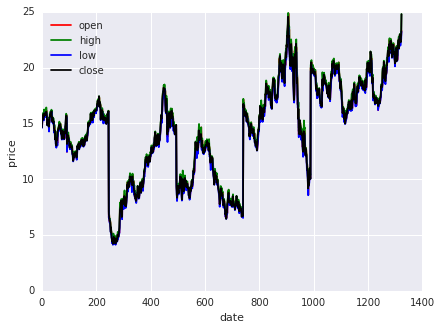

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(  df_stock.OPEN.values, color='red', label='open')
plt.plot(df_stock.HIGH.values, color='green', label='high')
plt.plot(df_stock.LOW.values, color='blue', label='low')
plt.plot(df_stock.CLOSE.values, color='black', label='close')
#plt.title('stock price')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='best')

### 1.4 Baseline comparison estimators

In [11]:
# Baseline Comparison estimator: naive or persistent model
def base_estimator_naive(y, num_outputs):  
  return np.ones(num_outputs)*y[-1]

In [12]:
# Baseline Comparison estimator: straight line
def base_estimator_SL(x,y,x_pred):
  A = np.vstack([x, np.ones(len(x))]).T
  m, c = np.linalg.lstsq(A, y)[0]
  
  return [(m*t + c) for t in x_pred]

### 1.5 Defining train and test dataset

In [13]:
def datasets_creation (df,test_size):
  df_size = len(df)
  test_index = df_size - test_size
  test = df[test_index:]
  
  train = df[:test_index]
  return  train, test, test_index

In [14]:
test_size = 20
#df_stock = pd.DataFrame(data=y, index=x,columns=['CLOSE']) # remove after testing
df_train,   df_test, test_index = datasets_creation(df_stock, test_size)
print(len(df_stock),len(df_test),  len(df_train),  test_index)

1324 20 1304 1304


In [15]:
def plot_train_test_datasets( df_train, df_test, test_index):
  total_dataset_lenght = len(df_train)+len(df_test)
  ts_train = range(test_index)
  ts_test = range (test_index , total_dataset_lenght)
  plt.figure(figsize=(15, 5));
  plt.subplot(1,2,1);
  plt.plot(ts_train,df_train.CLOSE.values, color='black', label='train')
  plt.plot(ts_test,df_test.CLOSE.values,"bo", color='green', label='test')
  plt.title('stock price')
  plt.xlabel('date')
  plt.ylabel('price')
  plt.legend(loc='best')
  plt.subplot(1,2,2);
  plt.plot(ts_test,df_test.CLOSE.values,label='Zoom on test dataset')
  plt.title('Zoom on test dataset')
  plt.xlabel('date')
  plt.ylabel('price')


### 1.6 Data scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

def scaling_datasets(train_values,test_values):
  scaler = MinMaxScaler()
  train_scaled = scaler.fit_transform(np.array(train_values).reshape(-1,1))
  test_scaled =scaler.transform(np.array(test_values).reshape(-1,1))
  full_dataset_scaled = np.concatenate((train_scaled,test_scaled))
  return train_scaled, test_scaled, full_dataset_scaled, scaler


In [17]:
train_scaled,  test_scaled, full_dataset_scaled, scaler = scaling_datasets(df_train.CLOSE.values,
                                                                           df_test.CLOSE.values)

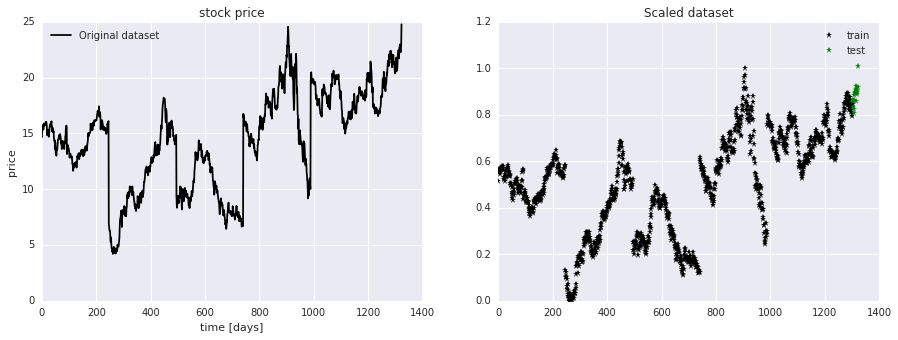

In [18]:
total_dataset_lenght = len(df_train)+len(df_test)
ts_train = range(test_index)
ts_test = range (test_index , total_dataset_lenght)
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df_stock.CLOSE.values, color='black', label='Original dataset')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.subplot(1,2,2);
plt.title('Scaled dataset')
plt.plot(ts_train,train_scaled,'*', color='black', label='train')
plt.plot(ts_test,test_scaled,'*', color='green', label='test')
plt.legend(loc='best')

### 1.7 Batching data

In [41]:
# split the training and validation datasets into X and y parts, shifted sequences prepared for the model
def create_X_y(dataset, size, starting_point, input_seq_len,output_seq_len):
    
    if starting_point - input_seq_len < 0:
      starting_x, size_batch_matrix = 0, size - input_seq_len 
    else: starting_x, size_batch_matrix = starting_point - input_seq_len, size
    
    X =np.zeros([size_batch_matrix, input_seq_len])
    y =np.zeros([size_batch_matrix, output_seq_len])
    # create all possible training sequences

    for index in range(size_batch_matrix):
        if starting_x+ index + input_seq_len+output_seq_len <= len (dataset):
          X[index] =  dataset[starting_x+ index : starting_x+ index + input_seq_len].flatten()
          y[index] =  dataset[starting_x+ index + input_seq_len : starting_x+ index + input_seq_len+output_seq_len].flatten()
      
      
    return X, y

In [42]:
input_seq_len = 20
output_seq_len = 5
train_index = 0
train_size = len(train_scaled)

#train_size = validation_index-train_index
X_train, y_train = create_X_y(full_dataset_scaled,train_size, train_index, input_seq_len, output_seq_len)
p = np.random.permutation(len(X_train))
X_train, y_train = X_train[p], y_train[p] # shuffles X_train and y_train for training

test_size = len(test_scaled)
X_test, y_test = create_X_y(full_dataset_scaled, test_size, test_index, input_seq_len,output_seq_len)

In [21]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

1284 1284 20 20


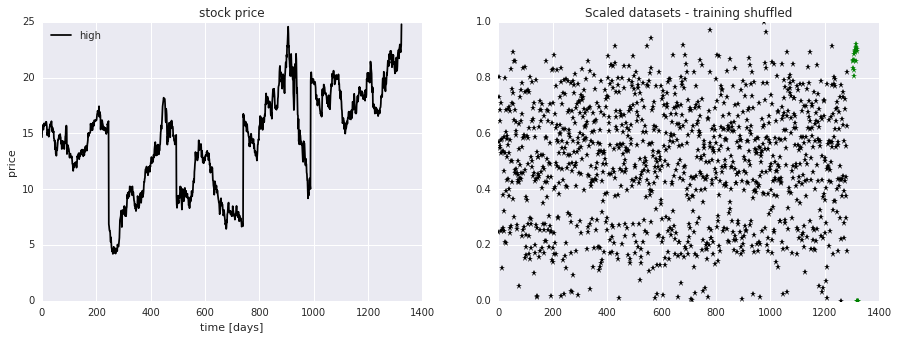

In [22]:
ts_total = len(df_stock)
ts_train = range(len(y_train))
ts_test = range (test_index,len(full_dataset_scaled))
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df_stock.CLOSE.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.subplot(1,2,2);
plt.title('Scaled datasets - training shuffled')
plt.plot(ts_train,y_train[:,0],'*', color='black', label='train')
plt.plot(ts_test,y_test[:,0],'*', color='green', label='test')

In [23]:
len(y_train)

1284

### 1.8 MAPE: Mean Absolute Percentage Error

In [24]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
  mask = y_true != 0
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean((np.abs((y_true - y_pred) / y_true))[mask]) * 100
  

### 1.9 Model

In [25]:
import tensorflow as tf
from math import sqrt
import os
from sklearn.metrics import mean_squared_error
from tensorflow.contrib import rnn
from tensorflow.python.ops import variable_scope
from tensorflow.python.framework import dtypes
import copy


In [26]:
## Parameters
learning_rate = 0.007
lambda_l2_reg = 0.003 
 
## Network Parameters
# length of input signals
input_seq_len = 60
# length of output signals
output_seq_len = 20
# size of LSTM Cell
hidden_dim = 64
# num of input signals
input_dim = 1
# num of output signals
output_dim = 1
# num of stacked lstm layers
num_stacked_layers = 2
# gradient clipping - to avoid gradient exploding
GRADIENT_CLIPPING = 2.5


In [27]:
def build_graph(feed_previous = False):
 
    tf.reset_default_graph()
 
    global_step = tf.Variable(
                  initial_value=0,
                  name="global_step",
                  trainable=False,
                  collections=[tf.GraphKeys.GLOBAL_STEP, tf.GraphKeys.GLOBAL_VARIABLES])
 
    weights = {
        'out': tf.get_variable('Weights_out', \
                               shape = [hidden_dim, output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.truncated_normal_initializer()),
    }
    biases = {
        'out': tf.get_variable('Biases_out', \
                               shape = [output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.constant_initializer(0.)),
    }
 
    with tf.variable_scope('Seq2seq'):
        # Encoder: inputs
        enc_inp = [
            tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
               for t in range(input_seq_len)
        ]
 
        # Decoder: target outputs
        target_seq = [
            tf.placeholder(tf.float32, shape=(None, output_dim), name="y".format(t))
              for t in range(output_seq_len)
        ]
        dropout = tf.placeholder(tf.float32)
 
        # Give a "GO" token to the decoder.
        # If dec_inp are fed into decoder as inputs, this is 'guided' training; otherwise only the
        # first element will be fed as decoder input which is then 'un-guided'
        dec_inp = [ tf.zeros_like(target_seq[0], dtype=tf.float32, name="GO") ] + target_seq[:-1]
 
        with tf.variable_scope('GRUCell'):
            cells = []
            for i in range(num_stacked_layers):
                with tf.variable_scope('RNN_{}'.format(i)):
                    cells.append(tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.GRUCell(hidden_dim),
                                                               output_keep_prob=1.0 - dropout))
            cell = tf.contrib.rnn.MultiRNNCell(cells)
 
        def _rnn_decoder(decoder_inputs,
                        initial_state,
                        cell,
                        loop_function=None,
                        scope=None):
          """RNN decoder for the sequence-to-sequence model.
          Args:
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            initial_state: 2D Tensor with shape [batch_size x cell.state_size].
            cell: rnn_cell.RNNCell defining the cell function and size.
            loop_function: If not None, this function will be applied to the i-th output
              in order to generate the i+1-st input, and decoder_inputs will be ignored,
              except for the first element ("GO" symbol). This can be used for decoding,
              but also for training to emulate http://arxiv.org/abs/1506.03099.
              Signature -- loop_function(prev, i) = next
                * prev is a 2D Tensor of shape [batch_size x output_size],
                * i is an integer, the step number (when advanced control is needed),
                * next is a 2D Tensor of shape [batch_size x input_size].
            scope: VariableScope for the created subgraph; defaults to "rnn_decoder".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing generated outputs.
              state: The state of each cell at the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
                (Note that in some cases, like basic RNN cell or GRU cell, outputs and
                 states can be the same. They are different for LSTM cells though.)
          """
          with variable_scope.variable_scope(scope or "rnn_decoder"):
            state = initial_state
            outputs = []
            prev = None
            for i, inp in enumerate(decoder_inputs):
              if loop_function is not None and prev is not None:
                with variable_scope.variable_scope("loop_function", reuse=True):
                  inp = loop_function(prev, i)
              if i > 0:
                variable_scope.get_variable_scope().reuse_variables()
              output, state = cell(inp, state)
              outputs.append(output)
              if loop_function is not None:
                prev = output
          return outputs, state
 
        def _basic_rnn_seq2seq(encoder_inputs,
                              decoder_inputs,
                              cell,
                              feed_previous,
                              dtype=dtypes.float32,
                              scope=None):
          """Basic RNN sequence-to-sequence model.
          This model first runs an RNN to encode encoder_inputs into a state vector,
          then runs decoder, initialized with the last encoder state, on decoder_inputs.
          Encoder and decoder use the same RNN cell type, but don't share parameters.
          Args:
            encoder_inputs: A list of 2D Tensors [batch_size x input_size].
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            feed_previous: Boolean; if True, only the first of decoder_inputs will be
              used (the "GO" symbol), all other inputs will be generated by the previous
              decoder output using _loop_function below. If False, decoder_inputs are used
              as given (the standard decoder case).
            dtype: The dtype of the initial state of the RNN cell (default: tf.float32).
            scope: VariableScope for the created subgraph; default: "basic_rnn_seq2seq".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing the generated outputs.
              state: The state of each decoder cell in the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
          """
          with variable_scope.variable_scope(scope or "basic_rnn_seq2seq"):
            enc_cell = copy.deepcopy(cell)
            _, enc_state = rnn.static_rnn(enc_cell, encoder_inputs, dtype=dtype)
            if feed_previous:
                return _rnn_decoder(decoder_inputs, enc_state, cell, _loop_function)
            else:
                return _rnn_decoder(decoder_inputs, enc_state, cell)
 
        def _loop_function(prev, _):
          '''Naive implementation of loop function for _rnn_decoder. Transform prev from
          dimension [batch_size x hidden_dim] to [batch_size x output_dim], which will be
          used as decoder input of next time step '''
          return tf.matmul(prev, weights['out']) + biases['out']
 
        dec_outputs, dec_memory = _basic_rnn_seq2seq(
            enc_inp,
            dec_inp,
            cell,
            feed_previous = feed_previous
        )
 
        reshaped_outputs = [tf.matmul(i, weights['out']) + biases['out'] for i in dec_outputs]
 
    # Training loss and optimizer
    with tf.variable_scope('Loss'):
        # L2 loss
        output_loss = 0
        for _y, _Y in zip(reshaped_outputs, target_seq):
            output_loss += tf.reduce_mean(tf.pow(_y - _Y, 2))
 
        # L2 regularization for weights and biases
        reg_loss = 0
        for tf_var in tf.trainable_variables():
            if 'Biases_' in tf_var.name or 'Weights_' in tf_var.name:
                reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))
 
        loss = output_loss + lambda_l2_reg * reg_loss
 
    with tf.variable_scope('Optimizer'):
        optimizer = tf.contrib.layers.optimize_loss(
                loss=loss,
                learning_rate=learning_rate,
                global_step=global_step,
                optimizer='Adam',
                clip_gradients=GRADIENT_CLIPPING)
 
    saver = tf.train.Saver
 
    return dict(
        enc_inp = enc_inp,
        target_seq = target_seq,
        dropout = dropout,
        train_op = optimizer,
        loss=loss,
        saver = saver,
        reshaped_outputs = reshaped_outputs,
        )

### 1.10 Train model

In [72]:
def train_rnn(num_epochs, X_train, y_train, input_seq_len, output_seq_len,dropout_rate,
           name = 'unidentified_model', print_results = True, epoch_interval_for_print = 5, batch_size =100, restore= False):
  
   # build rnn model
  rnn_model = build_graph(feed_previous=False)
  directory ="./results" 
  results_dir = directory + "/" + str(name)
  
 
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
 
      sess.run(init)
      if restore and (os.path.exists(results_dir)):
        print(directory)
        print(os.path.exists(directory))
        saver = rnn_model['saver']().restore(sess, os.path.join(results_dir, name))
      else:
          if not os.path.exists(directory):
              #print('makedirectory', directory)
              os.makedirs(directory)
          saver = tf.train.Saver()
        
      y_train_zeros = np.zeros([len(y_train),output_seq_len])

    
      for epoch_index in range(num_epochs+1):
        
        for batch_index in range(0,len(X_train),batch_size):
          X_batch = X_train[batch_index:batch_index+batch_size] 
          y_batch = y_train[batch_index:batch_index+batch_size] 
          feed_dict = {rnn_model['enc_inp'][t]: X_batch[:,t].reshape(-1,input_dim) for t in range(input_seq_len)}
          feed_dict.update({rnn_model['target_seq'][t]: y_batch[:,t].reshape(-1,output_dim) for t in range(output_seq_len)})
          feed_dict.update({rnn_model['dropout']: dropout_rate})
          _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        
     
      
        if ((epoch_index % epoch_interval_for_print == 0) & print_results):
          
          feed_dict = {rnn_model['enc_inp'][t]: X_train[:,t].reshape(-1,input_dim) for t in range(input_seq_len)}
          feed_dict.update({rnn_model['target_seq'][t]: y_train[:,t].reshape(-1,output_dim) for t in range(output_seq_len)})
          feed_dict.update({rnn_model['dropout']: 0.})
          final_preds_train = sess.run(rnn_model['reshaped_outputs'], feed_dict)
          _, loss_epoch = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        
        
          print('%.0f epochs | Loss = %.6f '%
                (epoch_index, loss_epoch))
                 
        # reshufle X_train and y_train prepared batches
        p= np.random.permutation(len(X_train))
        X_train[p], y_train[p]   
 

 
      temp_saver = rnn_model['saver']()
      save_path = temp_saver.save(sess, os.path.join(results_dir, ticker))
 
  print("Checkpoint saved at: ", save_path)
  return save_path


### 1.11 Make predictions with the model

In [29]:
def generate_predictions(X_test,name):
  
  rnn_model = build_graph(feed_previous=True)
  
  directory ="./results" 
  results_dir = directory + "/" + str(name)
 
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
  
      y_test_zeros = np.zeros([len(X_test),output_seq_len])
 
      sess.run(init)
 
      saver = rnn_model['saver']().restore(sess, os.path.join(results_dir, name))

      feed_dict = {rnn_model['enc_inp'][t]: X_test[:,t].reshape(-1,input_dim) for t in range(input_seq_len)}
      feed_dict.update({rnn_model['target_seq'][t]: y_test_zeros[:,t].reshape(-1,output_dim) for t in range(output_seq_len)})
      feed_dict.update({rnn_model['dropout']: 0.})
      final_preds_test = sess.run(rnn_model['reshaped_outputs'], feed_dict)
        
      final_preds_sorted = np.zeros((len(final_preds_test[0]),len(final_preds_test)))
      for i in range(len(final_preds_test)):
        for m in range (len(final_preds_test[0])):
          final_preds_sorted[m,i] = final_preds_test[i][m]

  return final_preds_sorted

### 1.12 Plot charts and evaluate errors

In [30]:
def charts_predictions_perfomance(name,df_stock,final_preds_test_sorted,scaler,input_seq_len=60,output_seq_len=20,
                                 plot_RNN = True, plot_baseline_estimators = True):
  
  prediction_rescaled = scaler.inverse_transform(final_preds_test_sorted)
  test_size = len(final_preds_test_sorted)
  test_index = len(df_stock)-test_size
  
  num_of_charts = int(test_size / output_seq_len)
  num_of_subplot_pairs_on_chart = int(num_of_charts / 2) + (num_of_charts % 2 > 0)
  plt.figure(figsize=(15, 5*num_of_subplot_pairs_on_chart))
  
  for i in range (0,test_size,output_seq_len):
    y_true =df_stock.CLOSE.values[test_index+i:test_index+i+output_seq_len]
    y_true_chart =df_stock.CLOSE.values[test_index+i-1:test_index+i+output_seq_len]
    rmse_test = sqrt(mean_squared_error(y_true, prediction_rescaled[i,:]))
    mape_test = mean_absolute_percentage_error(y_true, prediction_rescaled[i,:])

# Baseline estimator naive/persistent estimator 
    x2a = range(input_seq_len,input_seq_len + output_seq_len)
    x2a_chart=range(input_seq_len-1,input_seq_len + output_seq_len)
    
    x_input_for_base_comparison_naive = df_stock.CLOSE.values[test_index+i-input_seq_len:test_index+i]
    y_base_comparison_naive = base_estimator_naive(x_input_for_base_comparison_naive,output_seq_len)
    y_base_comparison_naive_chart= base_estimator_naive(x_input_for_base_comparison_naive,output_seq_len+1)
    mape_base_comparison_naive = mean_absolute_percentage_error(y_true, y_base_comparison_naive)
     
# Baseline estimator straight_line with lenght equal to input lenght (60 days) 
    x1a = range(input_seq_len)
    x2a = range(input_seq_len,input_seq_len + output_seq_len)
    x2a_chart=range(input_seq_len-1,input_seq_len + output_seq_len)
    
    x_input_for_base_comparison_SL60 = df_stock.CLOSE.values[test_index+i-input_seq_len:test_index+i]
    y_base_comparison_SL60 = base_estimator_SL(x1a,x_input_for_base_comparison_SL60,x2a)
    straight_line_SL60_chart = base_estimator_SL(x1a,x_input_for_base_comparison_SL60,x1a)
    y_base_comparison_SL60_chart= base_estimator_SL(x1a,x_input_for_base_comparison_SL60,x2a_chart)
    mape_base_comparison_SL60 = mean_absolute_percentage_error(y_true, y_base_comparison_SL60)
      
# Baseline estimator straight_line with lenght equal to input lenght (60 days) 
    x1b = range(input_seq_len - output_seq_len , input_seq_len)
    x2b = range(input_seq_len,input_seq_len + output_seq_len)
    x2b_chart=range(input_seq_len -1,input_seq_len + output_seq_len)
    
    x_input_for_base_comparison_SL20 = df_stock.CLOSE.values[test_index+i-output_seq_len:test_index+i]
    y_base_comparison_SL20 = base_estimator_SL(x1b,x_input_for_base_comparison_SL20,x2b)
    straight_line_SL20_chart = base_estimator_SL(x1b,x_input_for_base_comparison_SL20,x1b)
    y_base_comparison_SL20_chart= base_estimator_SL(x1b,x_input_for_base_comparison_SL20,x2b_chart)
    mape_base_comparison_SL20 = mean_absolute_percentage_error(y_true, y_base_comparison_SL20)
    
    prediction_chart = np.concatenate(([x_input_for_base_comparison_SL60[-1]],prediction_rescaled[i,:]))
    
    plt.subplot(num_of_subplot_pairs_on_chart,2,(i/output_seq_len)+1);
    plt.plot(x1a,x_input_for_base_comparison_SL60, color='black', label='Input test data')
    plt.plot(x2a_chart,y_true_chart, color='green', label='true data')
    
    # RNN predictions
    if plot_RNN:
      plt.plot(x2a_chart,prediction_chart, color="red")
      plt.plot(x2a,prediction_rescaled[i,:], "r.", linestyle = 'solid', color="red", markersize=10, label="RNN prediction")
      
                 
    if plot_baseline_estimators:
      # Baseline estimator: naive/persistent estimator
      plt.plot(x2a_chart,y_base_comparison_naive_chart, linestyle=':', color='orange', label='naive/persistent')  
      # Baseline estimator: straight line of 60 days
      plt.plot(x1a,straight_line_SL60_chart, 'b--')
      plt.plot(x2a_chart,y_base_comparison_SL60_chart, color='blue', label='straight line (60 days)')
      # Baseline estimator: straight line of 20 dyds
      plt.plot(x1b,straight_line_SL20_chart, linestyle = '--', color='m')
      plt.plot(x2b_chart,y_base_comparison_SL20_chart, color='m', label='straight line (20 days)')
      # Print baseline estimator
      
    plt.xlabel("Time")
    plt.title('Stock price ('+name+')')
    plt.ylabel('Price (BRL)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    # Print MAPEs
    if plot_RNN: print("MAPE RNN = %.2f%%"%(mape_test))
    if plot_baseline_estimators:
      print("MAPE Baseline Naive = %.2f%% \nMAPE Baseline (60 days) = %.2f%% \nMAPE Baseline (20 days) = %.2f%%"%
            ( mape_base_comparison_naive,  mape_base_comparison_SL60, mape_base_comparison_SL20))
  return [name, mape_test, mape_base_comparison_naive, mape_base_comparison_SL60, mape_base_comparison_SL20]

# 2. Main Analysis

### 2.1 Top 5 Negoratiated Stocks

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt 
from collections import OrderedDict 

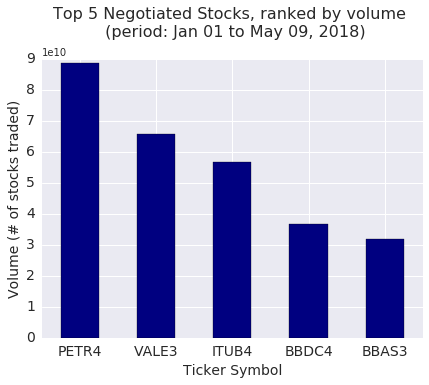

In [33]:
# Find the top 5 more negotiated stocks at Brazil Stock Exchange BM&FBOVESPA (B3)
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
top_negotiated_assets(df,"Top 5 Negotiated Stocks, ranked by volume \n (period: Jan 01 to May 09, 2018)")

### 2.2 Historical series of the selected stocks

In [34]:
# From item 2.1 above, we select the tickers of the most negotiated stocks
SELECTED_ASSETS = OrderedDict([('PETR4','Petrobras') , ('VALE3' , 'Vale') , ('ITUB4' , 'Itau Unibanco') , 
                   ('BBDC4' , 'Bradesco'),('BBAS3' , 'Banco do Brasil')])
SELECTED_TICKERS = SELECTED_ASSETS.keys()
MAPES_COLUMNS = ['mape_RNN', 'mape_base_comparison_naive', 'mape_base_comparison_SL60', 'mape_base_comparison_SL20']
mapes= pd.DataFrame(np.zeros([5,4]), index=SELECTED_TICKERS, columns=MAPES_COLUMNS)

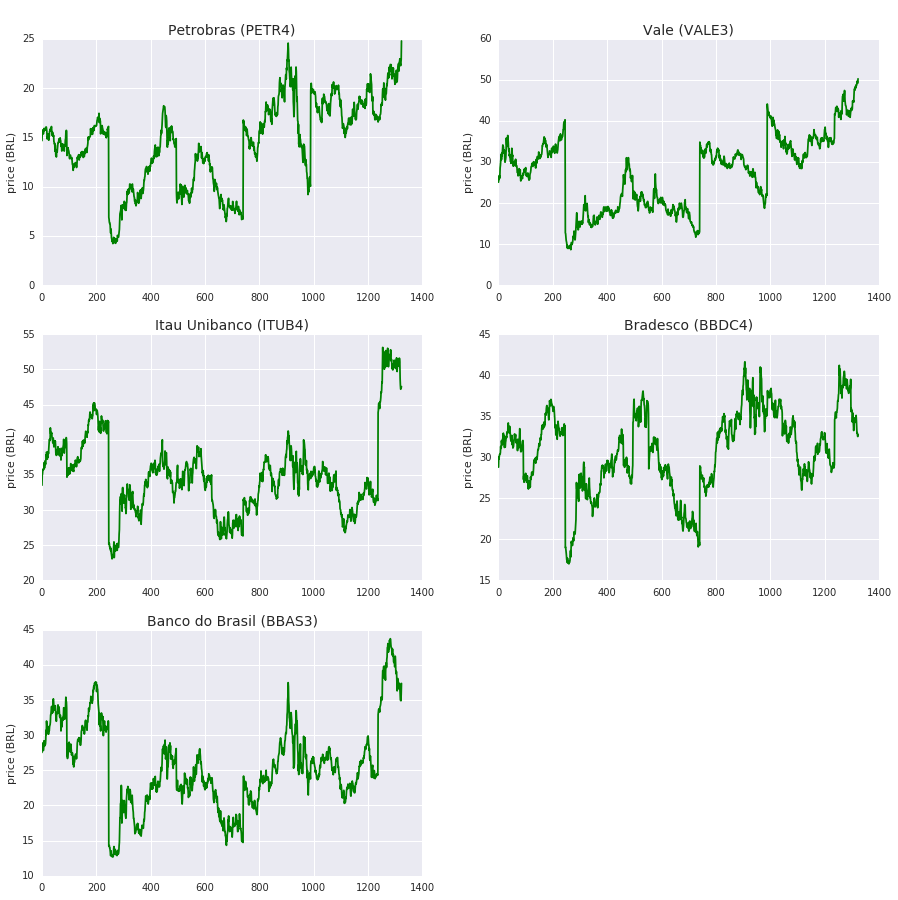

In [35]:
plot_historical_series(SELECTED_TICKERS)

### 2.3 Prepare data for analysis

In [76]:
ticker = 'BBAS3'
df_stock = data_filter(df,ticker = ticker,initial_date = '2013-01-01')


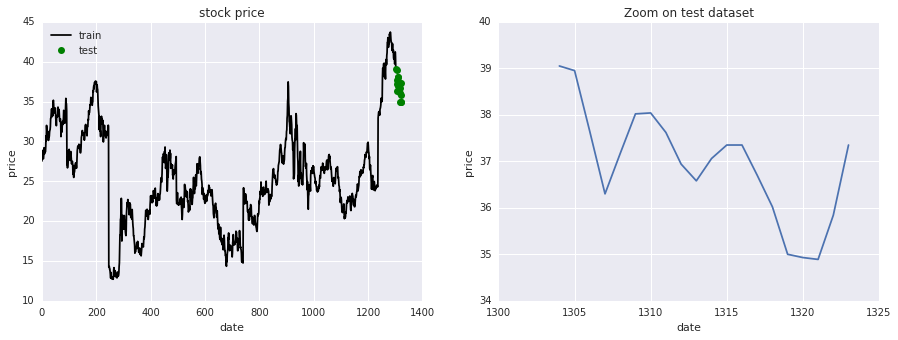

In [77]:
# Split dataset into train and test
test_size = 20
df_train, df_test, test_index = datasets_creation(df_stock, test_size)
plot_train_test_datasets(df_train, df_test, test_index)

### 2.4 Model hyperparameters

In [78]:
## Learning rate and R2 regularization
learning_rate = 0.007
lambda_l2_reg = 0.003 
 
## Network Parameters
# length of input signals
input_seq_len = 60
# length of output signals
output_seq_len = 20
# size of LSTM Cell
hidden_dim = 64
# num of input signals
input_dim = 1
# num of output signals
output_dim = 1
# num of stacked lstm layers
num_stacked_layers = 2
# gradient clipping - to avoid gradient exploding
GRADIENT_CLIPPING = 2.5


### 2.5 Create predictions for one case (repeat this procedure for each stock)

In [79]:
# scale dataset to be used into the model
train_scaled,  test_scaled, full_dataset_scaled, scaler = scaling_datasets(df_train.CLOSE.values,
                                                                           df_test.CLOSE.values)

In [80]:
# create batch matrix for training and testing
train_index = 0
train_size = len(train_scaled)

#train_size = validation_index-train_index
X_train, y_train = create_X_y(full_dataset_scaled,train_size, train_index, input_seq_len=input_seq_len, output_seq_len=output_seq_len)
p = np.random.permutation(len(X_train))
X_train, y_train = X_train[p], y_train[p] # shuffle X_train and y_train for training

test_size = len(test_scaled)
X_test, y_test = create_X_y(full_dataset_scaled, test_size, test_index, input_seq_len=input_seq_len, output_seq_len=output_seq_len)

In [ ]:
# train model
num_epochs= 500
batch_size = 100
dropout_rate =0
save_path = train_rnn(num_epochs, X_train, y_train, input_seq_len, output_seq_len,dropout_rate,
           name = ticker, print_results = True , epoch_interval_for_print = 25, batch_size=batch_size, restore= True)

In [81]:
final_preds_test = generate_predictions(X_test,name=ticker)


INFO:tensorflow:Restoring parameters from ./results/BBAS3/BBAS3
[2018-05-28 02:32:40,477] {tf_logging.py:82} INFO - Restoring parameters from ./results/BBAS3/BBAS3


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


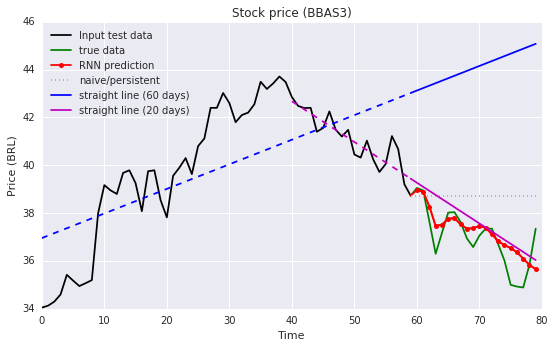

MAPE RNN = 1.57%
MAPE Baseline Naive = 5.09% 
MAPE Baseline (60 days) = 19.54% 
MAPE Baseline (20 days) = 2.36%


In [82]:
mapes_results = charts_predictions_perfomance(ticker,df_stock,final_preds_test,scaler,input_seq_len=input_seq_len,
                                       output_seq_len=output_seq_len,plot_RNN=True,plot_baseline_estimators=True)
mapes.loc[mapes_results[0],:] = mapes_results[1:] 

In [149]:
mapes

,mape_RNN,mape_base_comparison_naive,mape_base_comparison_SL60,mape_base_comparison_SL20
PETR4,2.585762,4.390639,3.829362,8.677824
VALE3,1.273739,5.939615,9.797803,7.743643
ITUB4,2.514182,2.636188,5.214693,2.525899
BBDC4,1.430710,2.372916,10.480525,3.328785
BBAS3,1.574748,5.088877,19.538326,2.355301


### 2.6 Plot MAPE errors for all the 5 stocks

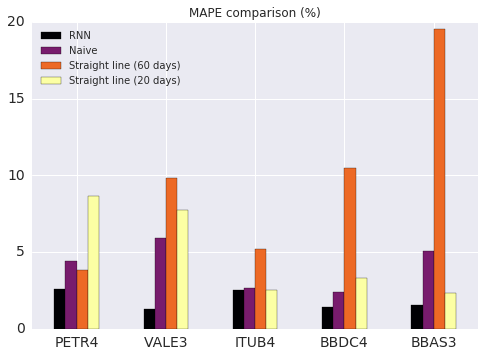

In [208]:
mapes_chart=mapes
mapes_chart.columns =['RNN', 'Naive', 'Straight line (60 days)', 'Straight line (20 days)']

ax = mapes.plot.bar(title='MAPE comparison (%)', fontsize=14, colormap = 'inferno', rot=0)